<h1>Continuous vs Discrete Collision Model

<h3>Import

In [13]:
# IMPORTS

import numpy as np
import pandas as pd

import math as m

import matplotlib.pyplot as plt

import seaborn as sns

<h3>Collision comparison

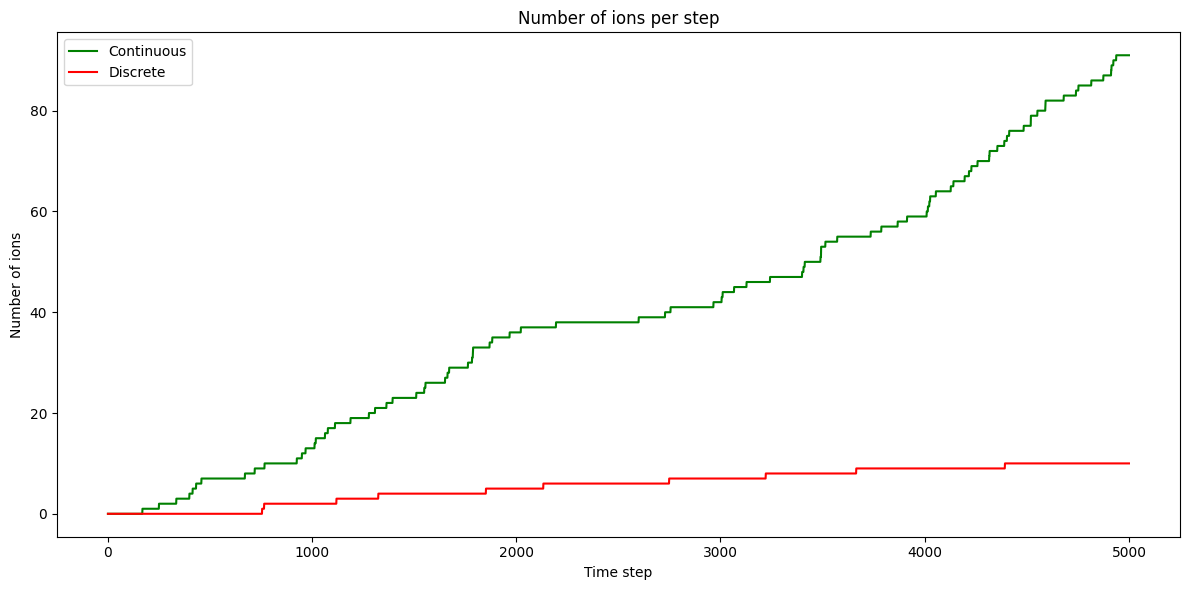

In [14]:
n = 1
N = 5000

cont_base = './Continuous/'
disc_base = './Discrete/'
coll_base = '/out/ramo_current.dt'
headers = ['time', 'step', 'current', 'volt', 'nrPart', 'nrElec', 'nrIon', 'avg_mob', 'avg_part_speed','avg_elec_speed','avg_ion_speed','a','b','c']

cont_ions = np.zeros(N)
disc_ions = np.zeros(N)
for i in range(1,n+1):
    cont_filename = f'{cont_base}S{str(i)}{coll_base}'
    df_cur = pd.read_csv(filepath_or_buffer=cont_filename, index_col = 1,delim_whitespace=True, \
                        header=None, names=headers)
    cont_ions += df_cur['nrIon'].values[:N]/n
    disc_filename = f'{disc_base}S{str(i)}{coll_base}'
    df_cur = pd.read_csv(filepath_or_buffer=disc_filename, index_col = 1,delim_whitespace=True, \
                        header=None, names=headers)
    disc_ions += df_cur['nrIon'].values[:N]/n

# Plot the number of ions for continuous and discrete
plt.figure(figsize=(12, 6))
plt.plot(df_cur.index[:N], cont_ions, label='Continuous', color='g')
plt.plot(df_cur.index[:N], disc_ions, label='Discrete', color='r')
plt.xlabel('Time step')
plt.ylabel('Number of ions')
plt.title('Number of ions per step')
plt.legend()
plt.tight_layout()  # Adjust the spacing between subplots
plt.show()